<a href="https://colab.research.google.com/github/juanjose1919/Proyectos-segundo-corte/blob/main/Project_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!pip install squarify
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import scipy.stats as st 
from scipy.stats import chi2
import seaborn as sns
import squarify as sq
from sklearn.linear_model import LinearRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/labeconometria/MLxE/main/proyectos2do/datasets3.csv')

In [ ]:
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

#Exploración inicial


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Conclusión intermedia: En la exploración inicial se evidencia que existen diferente número de datos para cada una de las variables que se analizan

In [ ]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [ ]:
data.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [ ]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000


#Limpieza



In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:

ph_not_null = data.drop(data[data.ph.isnull()].index)
ph_null = data.drop(ph_not_null.index)
features = ['Potability','Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon','Turbidity']
y = ph_not_null['ph']
x = ph_not_null[features]
model = LinearRegression()
model.fit(x,y)
x = ph_null[features]
predicted_ph = model.predict(x)
data.loc[data.ph.isnull(), "ph"] = predicted_ph
data.ph.isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


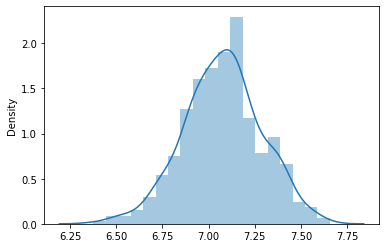

In [ ]:
sns.distplot(predicted_ph)
plt.savefig('predicted_ph.png')

In [ ]:
sulfate_not_null = data.drop(data[data.Sulfate.isnull()].index)
sulfate_null = data.drop(sulfate_not_null.index)
features = ['Potability','Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon','Turbidity']
y = sulfate_not_null['Sulfate']
x = sulfate_not_null[features]
model = LinearRegression()
model.fit(x,y)
x = sulfate_null[features]
predicted_sulfate = model.predict(x)
data.loc[data.Sulfate.isnull(), "Sulfate"] = predicted_sulfate
data.Sulfate.isna().sum()

0

In [ ]:
trihalomethanes_not_null = data.drop(data[data.Trihalomethanes.isnull()].index)
trihalomethanes_null = data.drop(trihalomethanes_not_null.index)
features = ['Potability','Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon','Turbidity']
y = trihalomethanes_not_null['Trihalomethanes']
x = trihalomethanes_not_null[features]
model = LinearRegression()
model.fit(x,y)
x = trihalomethanes_null[features]
predicted_trihalomethanes= model.predict(x)
data.loc[data.Trihalomethanes.isnull(), "Trihalomethanes"] = predicted_trihalomethanes
data.Trihalomethanes.isna().sum()

0

In [ ]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data.nunique()

ph                 3276
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            3276
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3276
Turbidity          3276
Potability            2
dtype: int64

In [ ]:
def calculateMahalanobis(y=None, data=None, cov=None):
  
    y_mu = y - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(y_mu, inv_covmat)
    mahal = np.dot(left, y_mu.T)
    return mahal.diagonal()


In [ ]:
df = pd.DataFrame(data,columns=['ph', 'Hardness',
                                'Solids','Chloramines', 
                                'Sulfate','Conductivity', 
                                'Organic_carbon', 
                                'Trihalomethanes',
                                'Turbidity'])

In [ ]:
df['calculateMahalanobis'] = calculateMahalanobis(y=df, data=df[['ph', 'Hardness',
                                'Solids','Chloramines', 
                                'Sulfate','Conductivity', 
                                'Organic_carbon', 
                                'Trihalomethanes',
                                'Turbidity']])

In [ ]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.173718  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  345.488920   
2     8.099124  224.236259  19909.541732     9.275884  334.268199   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  340.653125   
3273  9.419510  175.762646  33155.578218     7.350233  325.742465   
3274  5.126763  230.603758  11983.869376     6.303357  334.516912   
3275  7.874671  195.102299  17404.177061     7.509306  339.557289   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
0       564.308654       10.379783        86.990970   2.963135   
1       592.885359       15.180013        56.329076   4.500656   
2       418.606213       16.868637        66.420093   3.055934   
3       363.266516       18.436524       100.341674   4.628771   
4       398.410813       11.558279        31.997993   4.075075   
...            ...             ...              ...        ...   
3271    526.424171       13.894419        66.687695   4.435821   
3272    392.449580       19.903225        66.952003   2.798243   
3273    432.044783       11.039070        69.845400   3.298875   
3274    402.883113       11.168946        77.488213   4.708658   
3275    327.459760       16.140368        78.698446   2.309149   

      calculateMahalanobis  
0                 9.049807  
1                14.425361  
2                 4.917806  
3                 9.651222  
4                 9.027353  
...                    ...  
3271             14.136001  
3272              5.931287  
3273              7.063114  
3274              7.195663  
3275              7.248651  

[3276 rows x 10 columns]

In [ ]:
df['p'] = 1 - chi2.cdf(df['calculateMahalanobis'], 9)

In [ ]:
df.to_csv('data_mahalanobis.csv')

In [ ]:
outliers = df[df['p'] > 0.05]

In [ ]:
outliers

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.173718  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  345.488920   
2     8.099124  224.236259  19909.541732     9.275884  334.268199   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  340.653125   
3273  9.419510  175.762646  33155.578218     7.350233  325.742465   
3274  5.126763  230.603758  11983.869376     6.303357  334.516912   
3275  7.874671  195.102299  17404.177061     7.509306  339.557289   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
0       564.308654       10.379783        86.990970   2.963135   
1       592.885359       15.180013        56.329076   4.500656   
2       418.606213       16.868637        66.420093   3.055934   
3       363.266516       18.436524       100.341674   4.628771   
4       398.410813       11.558279        31.997993   4.075075   
...            ...             ...              ...        ...   
3271    526.424171       13.894419        66.687695   4.435821   
3272    392.449580       19.903225        66.952003   2.798243   
3273    432.044783       11.039070        69.845400   3.298875   
3274    402.883113       11.168946        77.488213   4.708658   
3275    327.459760       16.140368        78.698446   2.309149   

      calculateMahalanobis         p  
0                 9.049807  0.432689  
1                14.425361  0.107978  
2                 4.917806  0.841414  
3                 9.651222  0.379451  
4                 9.027353  0.434753  
...                    ...       ...  
3271             14.136001  0.117569  
3272              5.931287  0.746775  
3273              7.063114  0.630548  
3274              7.195663  0.616756  
3275              7.248651  0.611249  

[3009 rows x 11 columns]

In [ ]:
data['ph'] = outliers['ph']
data['Hardness'] = outliers['Hardness']
data['Solids'] = outliers['Solids']
data['Chloramines'] = outliers['Chloramines']
data['Sulfate'] = outliers['Sulfate']
data['Conductivity'] = outliers['Conductivity']
data['Organic_carbon'] = outliers['Organic_carbon']
data['Trihalomethanes'] = outliers['Trihalomethanes']
data['Turbidity'] = outliers['Turbidity']

In [ ]:
#data = data.drop(['index'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3009 non-null   float64
 1   Hardness         3009 non-null   float64
 2   Solids           3009 non-null   float64
 3   Chloramines      3009 non-null   float64
 4   Sulfate          3009 non-null   float64
 5   Conductivity     3009 non-null   float64
 6   Organic_carbon   3009 non-null   float64
 7   Trihalomethanes  3009 non-null   float64
 8   Turbidity        3009 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data.isna().sum()

ph                 267
Hardness           267
Solids             267
Chloramines        267
Sulfate            267
Conductivity       267
Organic_carbon     267
Trihalomethanes    267
Turbidity          267
Potability           0
dtype: int64

In [ ]:
data = data.dropna()
data.reset_index(inplace=True)
data

index        ph    Hardness        Solids  Chloramines     Sulfate  \
0         0  7.173718  204.890455  20791.318981     7.300212  368.516441   
1         1  3.716080  129.422921  18630.057858     6.635246  345.488920   
2         2  8.099124  224.236259  19909.541732     9.275884  334.268199   
3         3  8.316766  214.373394  22018.417441     8.059332  356.886136   
4         4  9.092223  181.101509  17978.986339     6.546600  310.135738   
...     ...       ...         ...           ...          ...         ...   
3004   3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3005   3272  7.808856  193.553212  17329.802160     8.061362  340.653125   
3006   3273  9.419510  175.762646  33155.578218     7.350233  325.742465   
3007   3274  5.126763  230.603758  11983.869376     6.303357  334.516912   
3008   3275  7.874671  195.102299  17404.177061     7.509306  339.557289   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3004    526.424171       13.894419        66.687695   4.435821           1  
3005    392.449580       19.903225        66.952003   2.798243           1  
3006    432.044783       11.039070        69.845400   3.298875           1  
3007    402.883113       11.168946        77.488213   4.708658           1  
3008    327.459760       16.140368        78.698446   2.309149           1  

[3009 rows x 11 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            3009 non-null   int64  
 1   ph               3009 non-null   float64
 2   Hardness         3009 non-null   float64
 3   Solids           3009 non-null   float64
 4   Chloramines      3009 non-null   float64
 5   Sulfate          3009 non-null   float64
 6   Conductivity     3009 non-null   float64
 7   Organic_carbon   3009 non-null   float64
 8   Trihalomethanes  3009 non-null   float64
 9   Turbidity        3009 non-null   float64
 10  Potability       3009 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 258.7 KB


#Transformación de los datos

In [ ]:
data.columns

Index(['index', 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity',
       'Potability'],
      dtype='object')

In [ ]:
data= data.astype({'Potability':'category'}) 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   index            3009 non-null   int64   
 1   ph               3009 non-null   float64 
 2   Hardness         3009 non-null   float64 
 3   Solids           3009 non-null   float64 
 4   Chloramines      3009 non-null   float64 
 5   Sulfate          3009 non-null   float64 
 6   Conductivity     3009 non-null   float64 
 7   Organic_carbon   3009 non-null   float64 
 8   Trihalomethanes  3009 non-null   float64 
 9   Turbidity        3009 non-null   float64 
 10  Potability       3009 non-null   category
dtypes: category(1), float64(9), int64(1)
memory usage: 238.3 KB


In [ ]:
'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'

('Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity')

#Categorización de variables

In [ ]:
data.pivot_table(index=["Potability"],
                  values=['ph','Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
                  aggfunc=["mean"])

mean                                                        \
           Chloramines Conductivity    Hardness Organic_carbon        Solids   
Potability                                                                     
0             7.084258   424.896057  196.630037      14.345107  21590.797368   
1             7.157867   424.490579  195.671396      14.223440  21771.258303   

                                                            
               Sulfate Trihalomethanes Turbidity        ph  
Potability                                                  
0           334.417172       66.302907  3.967144  7.070730  
1           334.534206       66.842558  3.977325  7.055454

En la tabla pivot se muestra las medias de cada variable diferenciadas por agua potable y no potable. En primer lugar el promedio de las cloraminas es mayor en el agua potable por lo que en primer lugar se podría inferir que entre menor cantidad de cloraminas baja la pureza del agua, después se muestra que el promedio de la conductividad para agua potable es menor, por lo que se entendería que a mayor conductividad menor pureza del agua. En este orden de ideas la dureza tendría una relación de efecto negativo en la pureza del agua, la presencia de carbón orgánico, igualmente, un efecto negativo, la presencia de sólidos en el agua tendría un efecto positivo en su pureza, así como el sulfato, los trihalometanos y la turbidez, por último el ph mostraría un efecto negativo, es decir se presenta un mayor ph en agua no potable.



In [ ]:
data['Conductivity_p1'] = pd.cut(data["Conductivity"],5)
data['Hardness_p1'] = pd.cut(data["Conductivity"],4)
data['Solids_p1'] = pd.cut(data["Conductivity"],4)
data['Chloramines_p1'] = pd.cut(data["Conductivity"],4)
data['Sulfate_p1'] = pd.cut(data["Conductivity"],4)
data['Organic_carbon_p1'] = pd.cut(data["Conductivity"],4)
data['Trihalomethanes_p1'] = pd.cut(data["Conductivity"],4)
data['Turbidity_p1'] = pd.cut(data["Conductivity"],4)
data['ph_p1'] = pd.cut(data["ph"],4)

data.to_csv('data_corte.csv')

In [ ]:
#data = data.drop(['index'], axis=1)

In [ ]:
data.pivot_table(index=["Potability"],
                columns=["ph_p1"])

Chloramines                                                \
ph_p1      (1.976, 4.394] (4.394, 6.803] (6.803, 9.212] (9.212, 11.621]   
Potability                                                                
0                7.251308       7.354238       6.973303        6.544706   
1                6.958035       6.999818       7.220019        7.671330   

             Conductivity                                                \
ph_p1      (1.976, 4.394] (4.394, 6.803] (6.803, 9.212] (9.212, 11.621]   
Potability                                                                
0              413.442402     423.301649     426.977484      422.872291   
1              441.646473     421.372486     425.250629      432.147455   

                 Hardness                 ...      Turbidity                  \
ph_p1      (1.976, 4.394] (4.394, 6.803]  ... (6.803, 9.212] (9.212, 11.621]   
Potability                                ...                                  
0              184.908483     190.113122  ...       3.917132        3.922834   
1              177.947266     193.432122  ...       3.986816        3.858506   

                    index                                                \
ph_p1      (1.976, 4.394] (4.394, 6.803] (6.803, 9.212] (9.212, 11.621]   
Potability                                                                
0             1775.876712     1513.66876    1555.501965     1626.151515   
1             1635.904762     1850.65122    1798.484940     1429.722222   

                       ph                                                
ph_p1      (1.976, 4.394] (4.394, 6.803] (6.803, 9.212] (9.212, 11.621]  
Potability                                                               
0                3.854332       5.941923       7.637104        9.928905  
1                3.956234       5.997988       7.580865        9.829008  

[2 rows x 40 columns]

Al separar las variables por categoría se evidencia que, en realidad los dos primeros rangos de presencia de cloraminas tienen un efecto negativo en la pureza del agua, mientras los dos siguientes rangos tienen un efecto positivo. Para la conductividad se evidencia que tanto el primer como último rango tienen efectos positivos en la pureza, mientras que el los restantes un mayor promedio se relaciona a aguas no potables. En la dureza se muestra una diferencia significativa entre los promedios del primer rango y únicamente en el último rango se muestra un efecto positivo en la potabilidad.
Se evidencia también que en los dos primeros rangos de presencia de carbón orgánico tienen un efecto negativo en la pureza del agua, los dos siguientes rangos tienen un efecto positivo. Para la presencia de sólidos en el agua se muestra que únicamente en el segundo rango una mayor presencia de sólidos indica la no potabilidad de agua. En el caso de la presencia de sulfato se evidencia en los dos rangos mayores un efecto negativo en la potabilidad. En los trihalometanos  solo el tercer rango indica un efecto positivo entre la cantidad y la potabilidad del agua, presentando el mismo caso que la turbidez. Así, el ph evidencia un efecto positivo en los dos primeros rangos y un efecto negativo en los restantes.

In [ ]:
val = data.pivot_table(index=["Potability"], columns=['Hardness_p1'])
val 

Chloramines                                        \
Hardness_p1 (180.999, 302.785] (302.785, 424.087] (424.087, 545.389]   
Potability                                                             
0                     7.125126           7.119870           7.024115   
1                     7.252345           7.116424           7.230486   

                                     Conductivity                     \
Hardness_p1 (545.389, 666.691] (180.999, 302.785] (302.785, 424.087]   
Potability                                                             
0                     7.169271         281.718463         373.102118   
1                     6.934198         281.998258         368.702534   

                                                            Hardness  \
Hardness_p1 (424.087, 545.389] (545.389, 666.691] (180.999, 302.785]   
Potability                                                             
0                   474.998389         576.831158         197.991653   
1                   477.519896         584.058996         193.858354   

                                ...          Turbidity                     \
Hardness_p1 (302.785, 424.087]  ... (424.087, 545.389] (545.389, 666.691]   
Potability                      ...                                         
0                   197.082741  ...           4.019670           4.029981   
1                   196.433335  ...           3.977375           3.878184   

                         index                                        \
Hardness_p1 (180.999, 302.785] (302.785, 424.087] (424.087, 545.389]   
Potability                                                             
0                  1592.333333        1576.620327        1528.341591   
1                  1848.634921        1754.789773        1834.267368   

                                               ph                     \
Hardness_p1 (545.389, 666.691] (180.999, 302.785] (302.785, 424.087]   
Potability                                                             
0                  1538.933333           6.951782           7.088305   
1                  1810.240964           7.047004           7.049610   

                                                   
Hardness_p1 (424.087, 545.389] (545.389, 666.691]  
Potability                                         
0                     7.033451           7.260965  
1                     7.038893           7.193823  

[2 rows x 40 columns]

In [ ]:
val['Hardness']

Hardness_p1  (180.999, 302.785]  (302.785, 424.087]  (424.087, 545.389]  \
Potability                                                                
0                    197.991653          197.082741          196.329069   
1                    193.858354          196.433335          194.590211   

Hardness_p1  (545.389, 666.691]  
Potability                       
0                    194.440735  
1                    198.388029

In [ ]:
val['Organic_carbon']

Hardness_p1  (180.999, 302.785]  (302.785, 424.087]  (424.087, 545.389]  \
Potability                                                                
0                     14.101156           14.371733           14.368054   
1                     13.583705           14.138911           14.391201   

Hardness_p1  (545.389, 666.691]  
Potability                       
0                     14.230229  
1                     14.286663

In [ ]:
val['Solids']

Hardness_p1  (180.999, 302.785]  (302.785, 424.087]  (424.087, 545.389]  \
Potability                                                                
0                  21253.653831        21437.233076        21954.721660   
1                  21939.115417        21095.632554        22586.922152   

Hardness_p1  (545.389, 666.691]  
Potability                       
0                  20751.610284  
1                  21273.849490

In [ ]:
val['Sulfate']

Hardness_p1  (180.999, 302.785]  (302.785, 424.087]  (424.087, 545.389]  \
Potability                                                                
0                    328.739217          335.436627          333.413832   
1                    341.204626          336.858021          330.495809   

Hardness_p1  (545.389, 666.691]  
Potability                       
0                    337.943540  
1                    337.799598

In [ ]:
val['Trihalomethanes']

Hardness_p1  (180.999, 302.785]  (302.785, 424.087]  (424.087, 545.389]  \
Potability                                                                
0                     64.623204            67.04439           65.712207   
1                     64.356353            66.40374           67.908768   

Hardness_p1  (545.389, 666.691]  
Potability                       
0                     66.226508  
1                     65.419393

In [ ]:
data

index        ph    Hardness        Solids  Chloramines     Sulfate  \
0         0  7.173718  204.890455  20791.318981     7.300212  368.516441   
1         1  3.716080  129.422921  18630.057858     6.635246  345.488920   
2         2  8.099124  224.236259  19909.541732     9.275884  334.268199   
3         3  8.316766  214.373394  22018.417441     8.059332  356.886136   
4         4  9.092223  181.101509  17978.986339     6.546600  310.135738   
...     ...       ...         ...           ...          ...         ...   
3004   3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3005   3272  7.808856  193.553212  17329.802160     8.061362  340.653125   
3006   3273  9.419510  175.762646  33155.578218     7.350233  325.742465   
3007   3274  5.126763  230.603758  11983.869376     6.303357  334.516912   
3008   3275  7.874671  195.102299  17404.177061     7.509306  339.557289   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity Potability  \
0       564.308654       10.379783        86.990970   2.963135          0   
1       592.885359       15.180013        56.329076   4.500656          0   
2       418.606213       16.868637        66.420093   3.055934          0   
3       363.266516       18.436524       100.341674   4.628771          0   
4       398.410813       11.558279        31.997993   4.075075          0   
...            ...             ...              ...        ...        ...   
3004    526.424171       13.894419        66.687695   4.435821          1   
3005    392.449580       19.903225        66.952003   2.798243          1   
3006    432.044783       11.039070        69.845400   3.298875          1   
3007    402.883113       11.168946        77.488213   4.708658          1   
3008    327.459760       16.140368        78.698446   2.309149          1   

         Conductivity_p1         Hardness_p1           Solids_p1  \
0     (472.608, 569.649]  (545.389, 666.691]  (545.389, 666.691]   
1     (569.649, 666.691]  (545.389, 666.691]  (545.389, 666.691]   
2     (375.566, 472.608]  (302.785, 424.087]  (302.785, 424.087]   
3     (278.525, 375.566]  (302.785, 424.087]  (302.785, 424.087]   
4     (375.566, 472.608]  (302.785, 424.087]  (302.785, 424.087]   
...                  ...                 ...                 ...   
3004  (472.608, 569.649]  (424.087, 545.389]  (424.087, 545.389]   
3005  (375.566, 472.608]  (302.785, 424.087]  (302.785, 424.087]   
3006  (375.566, 472.608]  (424.087, 545.389]  (424.087, 545.389]   
3007  (375.566, 472.608]  (302.785, 424.087]  (302.785, 424.087]   
3008  (278.525, 375.566]  (302.785, 424.087]  (302.785, 424.087]   

          Chloramines_p1          Sulfate_p1   Organic_carbon_p1  \
0     (545.389, 666.691]  (545.389, 666.691]  (545.389, 666.691]   
1     (545.389, 666.691]  (545.389, 666.691]  (545.389, 666.691]   
2     (302.785, 424.087]  (302.785, 424.087]  (302.785, 424.087]   
3     (302.785, 424.087]  (302.785, 424.087]  (302.785, 424.087]   
4     (302.785, 424.087]  (302.785, 424.087]  (302.785, 424.087]   
...                  ...                 ...                 ...   
3004  (424.087, 545.389]  (424.087, 545.389]  (424.087, 545.389]   
3005  (302.785, 424.087]  (302.785, 424.087]  (302.785, 424.087]   
3006  (424.087, 545.389]  (424.087, 545.389]  (424.087, 545.389]   
3007  (302.785, 424.087]  (302.785, 424.087]  (302.785, 424.087]   
3008  (302.785, 424.087]  (302.785, 424.087]  (302.785, 424.087]   

      Trihalomethanes_p1        Turbidity_p1            ph_p1  
0     (545.389, 666.691]  (545.389, 666.691]   (6.803, 9.212]  
1     (545.389, 666.691]  (545.389, 666.691]   (1.976, 4.394]  
2     (302.785, 424.087]  (302.785, 424.087]   (6.803, 9.212]  
3     (302.785, 424.087]  (302.785, 424.087]   (6.803, 9.212]  
4     (302.785, 424.087]  (302.785, 424.087]   (6.803, 9.212]  
...                  ...                 ...              ...  
3004  (424.087, 545.389]  (424.087, 545.389]   (4.394, 6.803]  
3005  (302.785, 424.08

#Visualización de los datos

##Distribución

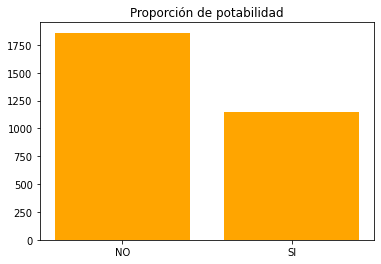

In [ ]:
pot = data['Potability'].value_counts()
pot.index = ['NO', 'SI']
plt.title('Proporción de potabilidad')

plt.bar(pot.index, pot.values, color = 'orange')
plt.savefig('Potability_count.png')

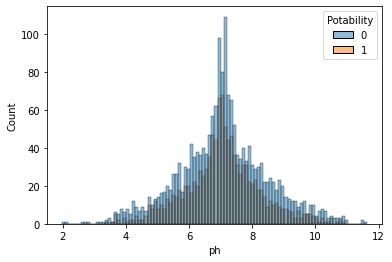

In [ ]:
sns.histplot(data=data, x='ph', hue='Potability', bins = 100)
plt.savefig('ph_count.png')

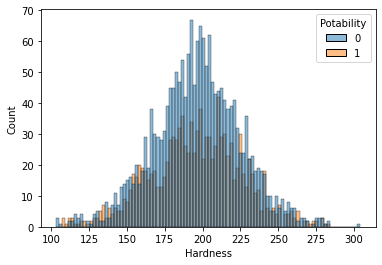

In [ ]:
sns.histplot(data=data, x='Hardness', hue='Potability', bins = 100)
plt.savefig('Hardness_count.png')

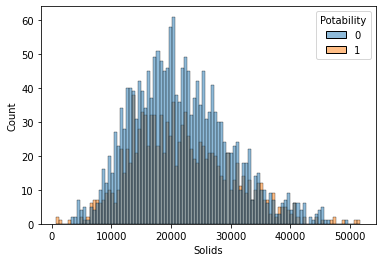

In [ ]:
sns.histplot(data=data, x='Solids', hue='Potability', bins = 100)
plt.savefig('Solids_count.png')

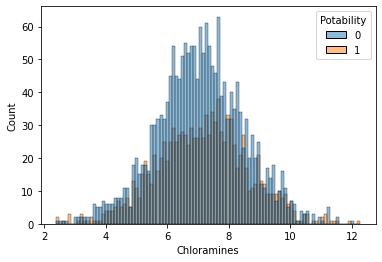

In [ ]:
sns.histplot(data=data, x='Chloramines', hue='Potability', bins = 100)
plt.savefig('Chloramines_count.png')

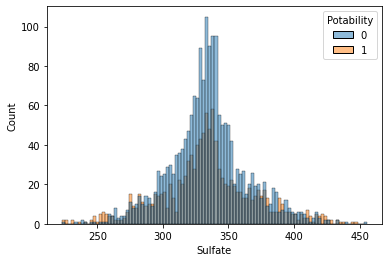

In [ ]:
sns.histplot(data=data, x='Sulfate', hue='Potability', bins = 100)
plt.savefig('Sulfate_count.png')

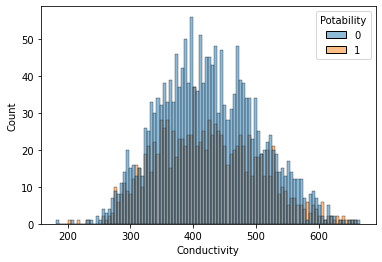

In [ ]:
sns.histplot(data=data, x='Conductivity', hue='Potability', bins = 100)
plt.savefig('Conductivity_count.png')

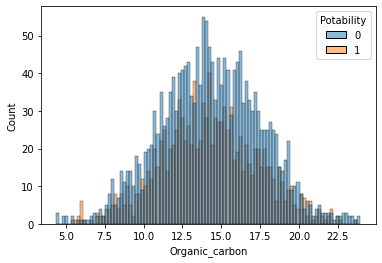

In [ ]:
sns.histplot(data=data, x='Organic_carbon', hue='Potability', bins = 100)
plt.savefig('Organic_carbon_count.png')

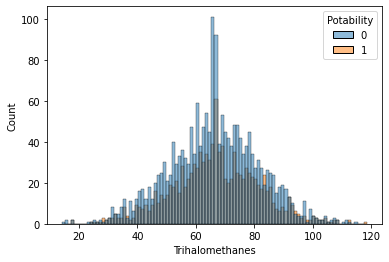

In [ ]:
sns.histplot(data=data, x='Trihalomethanes', hue='Potability', bins = 100)
plt.savefig('Trihalomethanes_count.png')

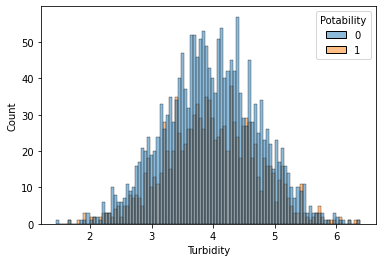

In [ ]:
sns.histplot(data=data, x='Turbidity', hue='Potability', bins = 100)
plt.savefig('Turbidity_count.png')

Dentro de la muestra se observa que en mayor parte el agua no es potable, estando sobre 1750 datos. Además tanto el agua potable como la no potable se concentran en un ph cercano a 7 en el estudio, en niveles de dureza entre 175 y 225 (clasificando así como agua dura), la cantidad de sólidos disueltos predomina entre los 1000 y los 30000, mostrando asi que el agua muestra comportamientos similares en estas categorías. Por el otro lado, la cantidad de cloraminas se concentra en niveles cercanos a 7 para el agua no potable, mientras que para el agua potable se inclina a niveles cercanos a 8.

En cuanto a la cantidad de sulfato tiene comportamientos similares para agua potable y no potable, los que se concentran mayormente en valores cercanos a 340, a diferencia de la conductividad que presenta valores mas dispersos mayormente en el rango de 330 y 500. La cantidad de carbon organico en ambos casos se concentran entre 12.5 y 15.4, en el caso de los trihalometanos existe una cantidad mas significativa en los datos cercanos a 68. Por ultimo la cantidad medida en unidades de turbiedad se dispersa en mayor medida entre 3.2 y 5.7 unidades nefelométricas de turbidez. 

##Relación

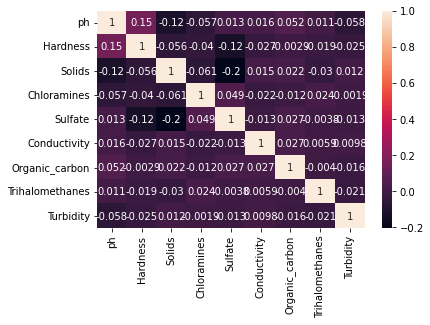

In [ ]:
data_2 = data[['ph','Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
sns.heatmap(data_2.corr(), annot=True)
plt.savefig('heatmap.png')

Se evidencia que la menor correlación existe entre la totalidad de sólidos disueltos en el agua y la cantidad de sulfato disuelta, seguido de la totalidad de sólidos disueltos con el número de ph, y el nivel de dureza frente a la cantidad de sulfato disuelta, mientras que la mayor correlación es entre el nivel de ph y el nivel de dureza, siendo este de sólo 0.15.

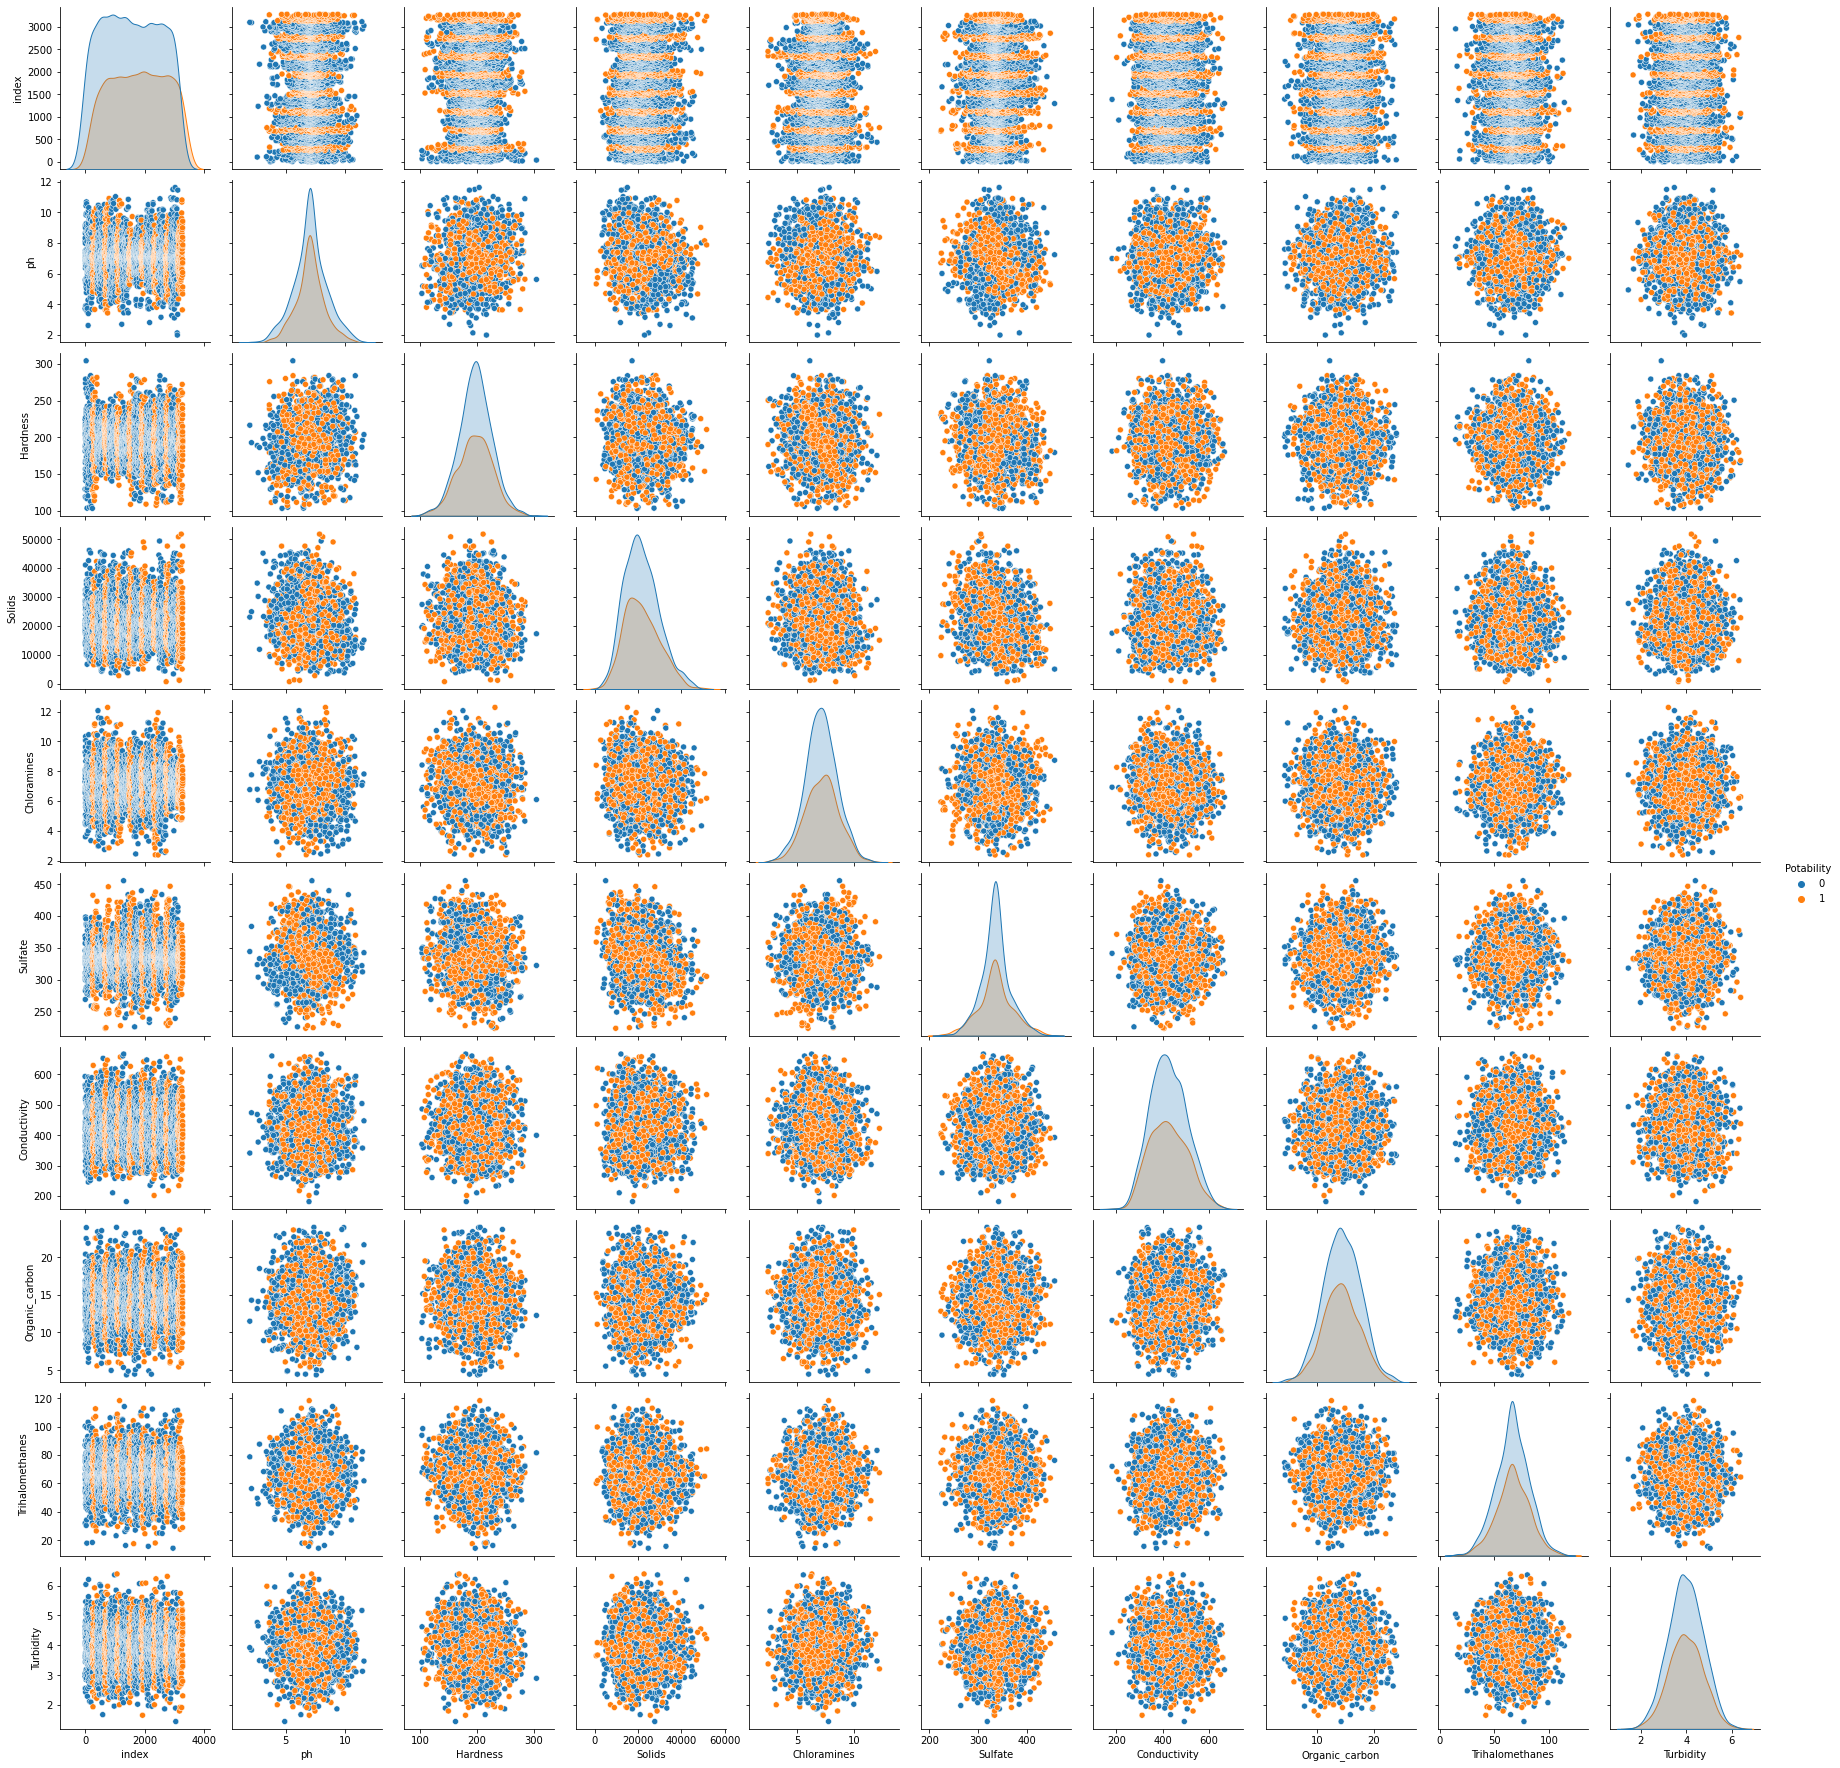

In [ ]:
#data['ph'] = data['ph']
sns.pairplot(data = data, hue = 'Potability')

Es posible observar que el agua se comporta de manera similar en cada categorías por separado, teniendo en cuenta que en la muestra predomina el agua no potable.Además se evidencia que el agua potable muestra más concentración en el promedio entre cada variable, mientras que el agua no potable llega a tener una mayor dispersión. Se puede concluir que el agua no es potable cuando las variables no están en equilibrio y sus valores se alejan de los promedios esperados.  

## Boxplots

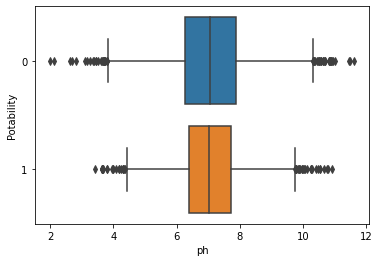

In [ ]:
sns.boxplot(data=data, x='ph', y='Potability')
plt.savefig('ph_boxplot.png')

Tanto para para el agua potable como para la no potable el ph se concentra en niveles entre 6 y 8, ambos presentan una distribucion simetrica de los datos y en el caso del aguna no potable existe una mayor disperción. 


In [ ]:
sns.boxplot(data=data, x='Solids', y='Potability')
plt.savefig('Solids_boxplot.png')

Tanto para para el agua potable como para la no potable la cantidad de solidos disueltos se concentra cerca a 20000, en ambos casos se presenta una asimetria positiva lo que indica que la media puede ser mayor que la mediana y se presentan outliers en valores mayores a 40000, sobre el limite superior. 

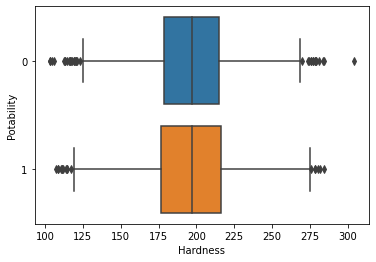

In [ ]:
sns.boxplot(data=data, x='Hardness', y='Potability')
plt.savefig('Hardness_boxplot.png')

Para los dos casos los niveles de dureza se concentran en los 200, la distribución de la dureza en el agua no potable es simetrica, por el contrario en el agua potable se presenta una asimetria negativa, indicando una media menor a la mediana. Se presentan outliers en tanto el limite inferior como el superior.

In [ ]:
sns.boxplot(data=data, x='Chloramines', y='Potability')
plt.savefig('Chloramines_boxplot.png')

Igualmente para los dos casos los niveles se concentran entre 6 y 8, siendo la disperción del agua potable ligeramente mayor. En este caso aunque para el valor de la mediana se inclina mas hacia un nivel de cloraminas de 8 mostrando una asimetria negativa, además se presentan outliers que sobrepasan ambos limites.

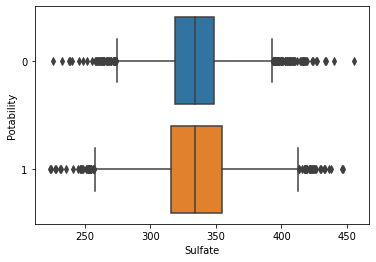

In [ ]:
sns.boxplot(data=data, x='Sulfate', y='Potability')
plt.savefig('Sulfate_boxplot.png')

En el caso de la cantidad de sulfato el agua potable muestra mayor dispersión, mostrando también una asimetría positiva, aunque tanto esta como el agua no potable tienen medianas similares.

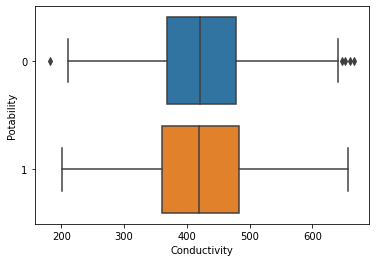

In [ ]:
sns.boxplot(data=data, x='Conductivity', y='Potability')
plt.savefig('Conductivity_boxplot.png')

En la conductividad el agua no potable muestra una ligera asimetría positiva, ambas dispersiones se sitúan entre los 380 y 490 aproximadamente y sólo en el caso del agua no potable se evidencian outliers en los dos límites.

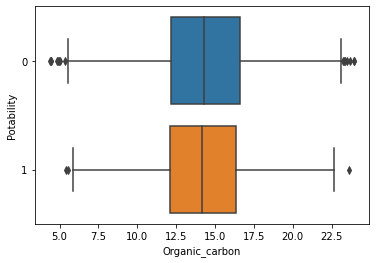

In [ ]:
sns.boxplot(data=data, x='Organic_carbon', y='Potability')

Para los dos casos los niveles se concentran entre 12 y 17, siendo la disperción del agua no potable ligeramente mayor. En este caso aunque para el valor de la mediana se inclina mas hacia un nivel mayor de carbón mostrando una asimetria positiv, se presentan outliers que sobrepasan ambos limites siendo mayores en el agua no potable.

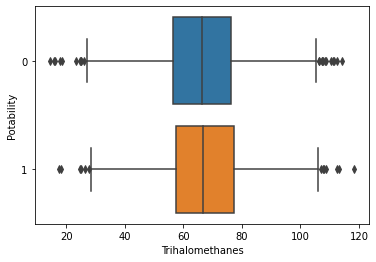

In [ ]:
sns.boxplot(data=data, x='Trihalomethanes', y='Potability')

Para para los trihalometanos se evidencian ambas dispersiones entre los 55 y 80, en este caso el agua no potable tiene una asimetría negativa mientras el agua potable una ligera asimetria positiva, las dos muestran outliers en ambos límites.

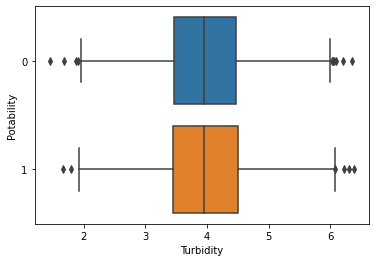

In [ ]:
sns.boxplot(data=data, x='Turbidity', y='Potability')
plt.savefig('Turbidity_boxplot.png')

En la turbidez el agua potable y no potable muestran medianas similares, junto a distribuciones simétricas entre 3.5 y 4.5, ambos casos presentan outliers tanto en el límite inferior como en el superior.

#Pruebas de hipótesis


##¿El dataset sin la variable objetivo sigue una distribución normal multivariada?

In [ ]:
independientes = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
independientes

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.173718  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  345.488920   
2     8.099124  224.236259  19909.541732     9.275884  334.268199   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3004  4.668102  193.681735  47580.991603     7.166639  359.948574   
3005  7.808856  193.553212  17329.802160     8.061362  340.653125   
3006  9.419510  175.762646  33155.578218     7.350233  325.742465   
3007  5.126763  230.603758  11983.869376     6.303357  334.516912   
3008  7.874671  195.102299  17404.177061     7.509306  339.557289   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076   4.500656  
2       418.606213       16.868637        66.420093   3.055934  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
...            ...             ...              ...        ...  
3004    526.424171       13.894419        66.687695   4.435821  
3005    392.449580       19.903225        66.952003   2.798243  
3006    432.044783       11.039070        69.845400   3.298875  
3007    402.883113       11.168946        77.488213   4.708658  
3008    327.459760       16.140368        78.698446   2.309149  

[3009 rows x 9 columns]

In [ ]:
!pip install pingouin


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pingouin import multivariate_normality
from statsmodels.stats.weightstats import ztest as ztest

##Mutivariado

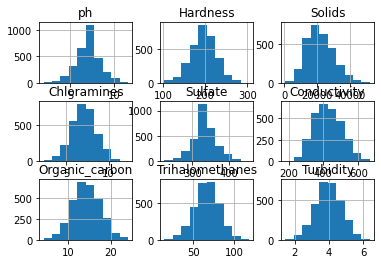

In [ ]:
data.hist()
plt.savefig("hist.png")

In [ ]:
multi = multivariate_normality(independientes, alpha = .05 )
multi

Al analisar los datos sin la variable objetivo se rechaza la hipotesis nula, con un p-value menor a 0.05, se concluye que sin la variable objetivo el dataset no sigue una distribución normal multivariada.

##Distribucion normal de las variables

In [ ]:
for i in independientes.columns:
  a = st.shapiro(independientes[i])
  if a[1]<0.05: 
    print(f'El P-valor de {i} es {a[1]}, se rechaza la Hipótesis nula, no se distribuye normalmente')
  else:
    print(f'El P-valor de {i} es {a[1]}, no hay evidencia suficiente para rechazar la Hipótesis nula, se distribuye normalmente')

In [ ]:
b = ztest(data['Potability'], value= len(data['Potability']))
if b[1]<0.05: 
  print(f'El P-valor de Potability es {b[1]}, se rechaza la ho, no se distribuye normalmente')
else:
  print(f'El P-valor de Potability es {b[1]}, no hay evidencia suficiente para rechazar la ho, se distribuye normalmente')

##¿Existe alguna diferencia en la media y la mediana de cada una de las variables si se divide el dataset en agua potable y no potable?

In [ ]:
data.groupby('Potability').agg({'ph':['mean','median'], 'Hardness':['mean','median'], 'Solids':['mean','median'], 'Chloramines':['mean','median'], 'Sulfate':['mean','median'], 'Conductivity':['mean','median'], 'Organic_carbon':['mean','median'], 'Trihalomethanes':['mean','median'], 'Turbidity':['mean','median']})

Evaluando la media y la mediana de las variables de las caracteristicas del agua, se encuentra que tanto para agua potable como para agua no potable existen diferencias entre la media y la mediana pero no son significativas, puesto que en una aproximación de los valores de la media estos llegan a ser iguales que los valores de la mediana.

#Conclusiones generales


En el dataset se puede observar en primer lugar que la muestra de agua no potable es significativamente mayor a la del modelo, lo cual puede afectar en los resultados. Se busca definir la pureza o potabilidad del agua a partir de diferentes variables las cuales no presentan correlaciones significativas entre ellas. Se puede observar que los componentes del agua tanto pura como potable tienen comportamientos similares, aún así se evidencia que los datos del agua no potable tienen una dispersión mayor, en este caso si tan solo una de las características de los componentes no alcanzan o sobrepasa los estándares ideales para un consumo sano creará un desequilibrio, lo que la ingresaría en la clasificación de no potable.